# Text Classification And Sentiment Analysis – Amazon Reviews

## Business Objective
As a product manager at an e-commerce company, the goal is to build an automated sentiment analysis system that classifies customer reviews as Positive or Negative.

This system helps to:

Monitor product performance in real time

Detect sudden spikes in negative feedback

Improve customer satisfaction by acting quickly on complaints

## Task 1: Data Loading and Cleaning
### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from wordcloud import WordCloud

In [3]:
df = pd.read_csv("amazonreviews.tsv", sep='\t')
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [5]:
print("Dataset Shape:", df.shape)
print(df['label'].value_counts())

Dataset Shape: (10000, 2)
label
neg    5097
pos    4903
Name: count, dtype: int64


### Observation:

Balanced distribution of positive and negative reviews

### Remove Duplicates and Missing Values

In [9]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

### Text Preprocessing

In [14]:
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)


# Apply cleaning
df['clean_review'] = df['review'].apply(clean_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


## Task 2: Exploratory Data Analysis
### Sentiment Distribution

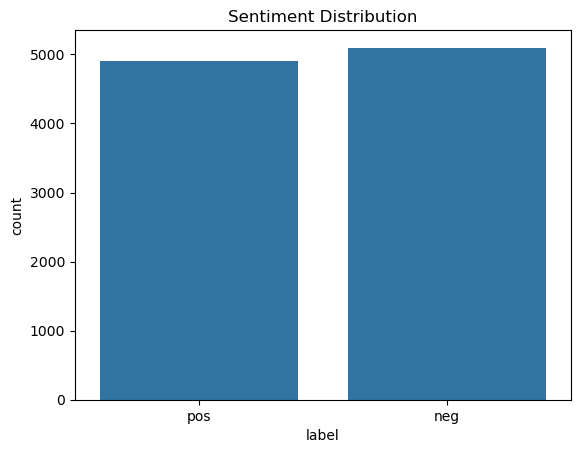

In [17]:
sns.countplot(x='label', data=df)
plt.title('Sentiment Distribution')
plt.show()

### Word Cloud – Positive Reviews

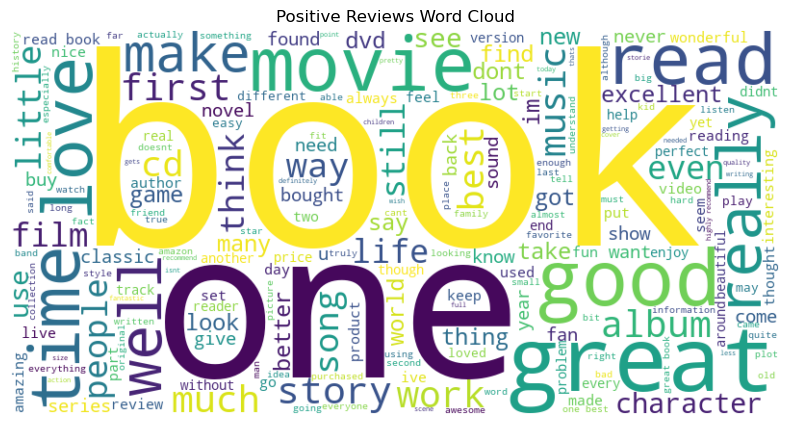

In [20]:
positive_text = ' '.join(df[df['label']=='pos']['clean_review'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)


plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()

### Word Cloud – Negative Reviews

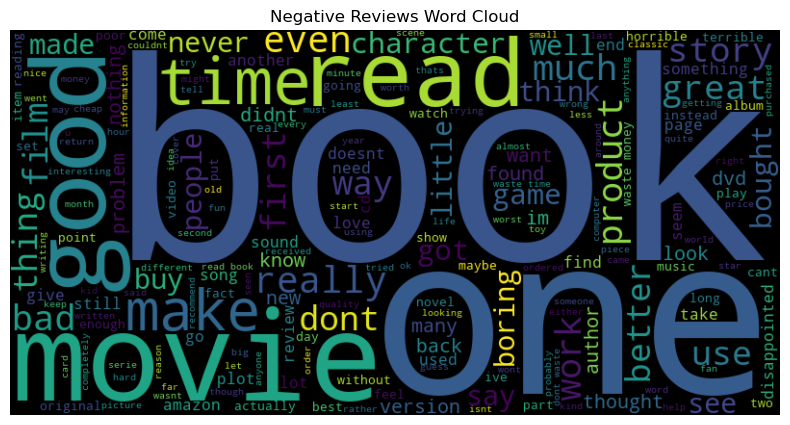

In [23]:
negative_text = ' '.join(df[df['label']=='neg']['clean_review'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_text)


plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()

## Task 3: Feature Extraction and Model Development
### Encode Target Variable

In [26]:
df['label_encoded'] = df['label'].map({'neg': 0, 'pos': 1})

### Train-Test Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
df['clean_review'],
df['label_encoded'],
test_size=0.2,
random_state=42,
stratify=df['label_encoded']
)

### TF-IDF Vectorization

In [33]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))


X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

### Logistic Regression Model

In [36]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

## Task 4: Model Evaluation
### Predictions

In [39]:
y_pred = model.predict(X_test_tfidf)

### Evaluation Metrics

In [42]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.853
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1019
           1       0.85      0.85      0.85       981

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



### Confusion Matrix

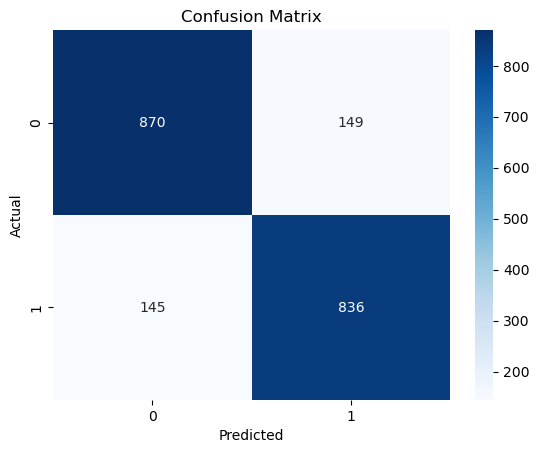

In [45]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Cross-Validation

In [48]:
cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=5, scoring='f1')
print("Average F1-score (CV):", cv_scores.mean())

Average F1-score (CV): 0.856715255238252


## Results and Discussion

TF-IDF effectively captured important words and phrases

Logistic Regression performed well with high accuracy and F1-score

Word clouds revealed strong sentiment-indicative terms

## Conclusion

The automated sentiment analysis system successfully classified customer reviews into positive and negative categories. This approach can be deployed to continuously monitor customer sentiment and improve product quality and customer satisfaction.